In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    


# Loan_2014 data

In [210]:
df = pd.read_csv('/Users/chloe.song/Documents/Projects/DS191/11FinTech/data/loan_2014.csv') 

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
cols = df.columns.values
cols

array(['addrstate', 'mthssincelastdelinq', 'grade',
       'secappmthssincelastmajorderog', 'installment', 'totalbalil',
       'accnowdelinq', 'numtl30dpd', 'earliestcrline', 'openrv12m',
       'collections12mthsexmed', 'openacc', 'totalbclimit',
       'numtl90gdpd24m', 'revolbal', 'secapprevolutil',
       'initialliststatus', 'mosinrcnttl', 'totcurbal', 'numtloppast12m',
       'openil12m', 'emptitle', 'mthssincerecentbcdlq', 'avgcurbal',
       'verificationstatus', 'pcttlnvrdlq', 'fundedamnt', 'delinq2yrs',
       'totcollamt', 'percentbcgt75', 'inqlast6mths', 'numbctl',
       'secappmortacc', 'totalilhighcreditlimit', 'mosinoldrevtlop',
       'numactvbctl', 'homeownership', 'mthssincerecentinq', 'term',
       'applicationtype', 'totalbalexmort', 'mortacc',
       'numacctsever120pd', 'mosinoldilacct', 'purpose', 'annualinc',
       'taxliens', 'openacc6m', 'numtl120dpd2m', 'secappearliestcrline',
       'ilutil', 'mthssincercntil', 'numrevaccts', 'subgrade', 'numsats',
     

# Explore data 
Last two rows are invalid

In [132]:
df.tail()

,addrstate,mthssincelastdelinq,grade,secappmthssincelastmajorderog,installment,totalbalil,accnowdelinq,numtl30dpd,earliestcrline,openrv12m,...,mthssincerecentbc,openactil,pubrec,openrv24m,intrate,secappopenacc,pubrecbankruptcies,secappcollections12mthsexmed,issued,loanstatus
235626,CA,13.0,A,NaN,62.59,NaN,0.0,0.0,Feb-2003,NaN,...,5.0,NaN,0.0,NaN,7.90%,NaN,0.0,NaN,Jan-2014,Fully Paid
235627,OH,65.0,D,NaN,514.34,NaN,0.0,0.0,Dec-2001,NaN,...,93.0,NaN,0.0,NaN,16.99%,NaN,0.0,NaN,Jan-2014,Fully Paid
235628,CA,9.0,D,NaN,367.58,NaN,0.0,0.0,Feb-2000,NaN,...,4.0,NaN,0.0,NaN,19.20%,NaN,0.0,NaN,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numeric and categorical data

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 103 entries, addrstate to loanstatus
dtypes: float64(85), object(18)
memory usage: 185.2+ MB


In [134]:
df.isnull().sum()

addrstate                             2
mthssincelastdelinq              115883
grade                                 2
secappmthssincelastmajorderog    235631
installment                           2
totalbalil                       235631
accnowdelinq                          2
numtl30dpd                            2
earliestcrline                        2
openrv12m                        235631
collections12mthsexmed                2
openacc                               2
totalbclimit                          2
numtl90gdpd24m                        2
revolbal                              2
secapprevolutil                  235631
initialliststatus                     2
mosinrcnttl                           2
totcurbal                             2
numtloppast12m                        2
openil12m                        235631
emptitle                          13238
mthssincerecentbcdlq             173350
avgcurbal                             8
verificationstatus                    2


## Find all_null_feature, num_feature, obj_feature

In [135]:
all_null_feature=[]
num_feature=[]
obj_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            obj_feature.append(col)
        else:
            num_feature.append(col)
    

In [136]:
print (len(num_feature), len(obj_feature))
print (len(all_null_feature))

56 18
29


In [137]:
all_null_feature

['secappmthssincelastmajorderog',
 'totalbalil',
 'openrv12m',
 'secapprevolutil',
 'openil12m',
 'secappmortacc',
 'openacc6m',
 'secappearliestcrline',
 'ilutil',
 'mthssincercntil',
 'allutil',
 'annualincjoint',
 'inqfi',
 'revolbaljoint',
 'memberid',
 'openil24m',
 'maxbalbc',
 'secappchargeoffwithin12mths',
 'inqlast12m',
 'dtijoint',
 'secappnumrevaccts',
 'verificationstatusjoint',
 'secappinqlast6mths',
 'totalcutl',
 'secappopenactil',
 'openactil',
 'openrv24m',
 'secappopenacc',
 'secappcollections12mthsexmed']

In [138]:
obj_feature

['addrstate',
 'grade',
 'earliestcrline',
 'initialliststatus',
 'emptitle',
 'verificationstatus',
 'homeownership',
 'term',
 'applicationtype',
 'purpose',
 'subgrade',
 'id',
 'emplength',
 'zipcode',
 'revolutil',
 'intrate',
 'issued',
 'loanstatus']

In [139]:
num_feature

['mthssincelastdelinq',
 'installment',
 'accnowdelinq',
 'numtl30dpd',
 'collections12mthsexmed',
 'openacc',
 'totalbclimit',
 'numtl90gdpd24m',
 'revolbal',
 'mosinrcnttl',
 'totcurbal',
 'numtloppast12m',
 'mthssincerecentbcdlq',
 'avgcurbal',
 'pcttlnvrdlq',
 'fundedamnt',
 'delinq2yrs',
 'totcollamt',
 'percentbcgt75',
 'inqlast6mths',
 'numbctl',
 'totalilhighcreditlimit',
 'mosinoldrevtlop',
 'numactvbctl',
 'mthssincerecentinq',
 'totalbalexmort',
 'mortacc',
 'numacctsever120pd',
 'mosinoldilacct',
 'annualinc',
 'taxliens',
 'numtl120dpd2m',
 'numrevaccts',
 'numsats',
 'totalacc',
 'loanamnt',
 'tothicredlim',
 'bcutil',
 'bcopentobuy',
 'mosinrcntrevtlop',
 'numrevtlbalgt0',
 'dti',
 'mthssincelastmajorderog',
 'numactvrevtl',
 'chargeoffwithin12mths',
 'numiltl',
 'numoprevtl',
 'numbcsats',
 'totalrevhilim',
 'mthssincelastrecord',
 'accopenpast24mths',
 'delinqamnt',
 'mthssincerecentrevoldelinq',
 'mthssincerecentbc',
 'pubrec',
 'pubrecbankruptcies']

In [140]:
i=3
feat = obj_feature[i]
print (feat)

print (df[feat].isnull().sum()) # initialliststatus 有2个空值

df[feat].value_counts()


initialliststatus
2


w    123473
f    112156
Name: initialliststatus, dtype: int64

In [21]:
i=1
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum()) # grade 有2个空值
df[feat].value_counts()

grade
2


C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

In [25]:
i=7
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

term
2


 36 months    162570
 60 months     73059
Name: term, dtype: int64

In [30]:
# earliestcrline: The date the borrower's earliest reported credit line was opened

# date format, convert to time difference, eg, months to 2015 and thus is a numeric feature

i= 2
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

earliestcrline
2


Aug-2001    1980
Aug-2000    1945
Sep-2000    1719
Aug-2002    1711
Aug-1999    1696
Oct-2000    1658
Sep-1999    1642
Sep-2002    1574
Oct-2001    1574
Sep-2001    1562
Oct-1999    1543
Nov-1999    1525
Sep-1998    1505
Oct-2002    1472
Nov-2000    1468
Mar-2001    1452
Nov-2001    1440
Jul-2001    1421
Sep-2003    1415
Mar-2000    1399
Aug-2003    1389
May-2001    1384
Oct-1998    1371
Jul-2002    1370
Jun-2000    1366
Jun-2001    1356
Jul-2000    1351
Apr-2001    1347
Oct-2003    1327
Aug-1998    1312
            ... 
Jul-1958       1
Aug-1958       1
Mar-1960       1
May-1963       1
Mar-1959       1
Aug-1961       1
Mar-1962       1
Dec-1963       1
Sep-1957       1
Oct-1962       1
Mar-1961       1
May-1950       1
Apr-1962       1
Jan-1954       1
Feb-1961       1
Jan-1948       1
Jul-1961       1
Nov-1954       1
Oct-1958       1
Jan-1953       1
May-1958       1
Aug-1962       1
Aug-1946       1
Aug-1960       1
Oct-1950       1
Jan-1944       1
Dec-1956       1
Sep-1963      

In [31]:
# applicationtype: whether the loan is an individual application or a joint application with two co-borrowers
# all "individual", that is the reason for all join-stuff are NA
i=8
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

applicationtype
2


Individual    235629
Name: applicationtype, dtype: int64

In [32]:
#intrate: Interest Rate on the loan

i=15
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

intrate
2


 12.99%    12630
 10.99%    10684
 15.61%    10309
 12.49%     9704
 13.98%     8855
 14.99%     8101
 17.57%     7686
 13.35%     7620
 11.67%     7255
 14.49%     7243
 11.99%     6199
 10.15%     6116
 16.99%     5946
  9.17%     5656
  8.39%     5575
 16.29%     5414
  6.03%     5146
  7.69%     4962
  6.49%     4026
 18.24%     3597
  9.67%     3455
  8.90%     3384
 18.99%     3214
  7.12%     3055
 14.64%     3029
 14.16%     2952
 19.52%     2926
  7.90%     2885
 15.31%     2838
 13.65%     2753
           ...  
 20.49%      983
 17.14%      974
 16.49%      968
 24.99%      963
 21.99%      916
 21.18%      858
  6.99%      855
 17.86%      765
 18.54%      720
 19.22%      663
 25.57%      647
 19.24%      588
 22.45%      558
 25.80%      526
 19.97%      517
 20.50%      470
 25.83%      426
 21.48%      332
 25.89%      305
 22.40%      276
 22.99%      241
 23.40%      214
 25.99%      214
 26.06%      212
 22.90%      212
 23.99%      179
 23.70%      163
  6.00%       

In [49]:
'''
# desc: Loan description provided by the borrower
# only 15279 not null values, and involv NLP. simply drop it, or make it classify them to null and not_null, short v.s. long
# this part might be quite similar to the purpose feature, which is quite important.

i=6
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

'''


'\n# desc: Loan description provided by the borrower\n# only 15279 not null values, and involv NLP. simply drop it, or make it classify them to null and not_null, short v.s. long\n# this part might be quite similar to the purpose feature, which is quite important.\n\ni=6\nfeat = obj_feature[i]\nprint (feat)\nprint (df[feat].isnull().sum())\ndf[feat].value_counts()\n\n'

In [34]:
# only use 36 months data for our project
i=7
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (df.term.value_counts(normalize=True))
df[feat].value_counts()

term
2
 36 months    0.689941
 60 months    0.310059
Name: term, dtype: float64


 36 months    162570
 60 months     73059
Name: term, dtype: int64

In [35]:
# one hot encoding, but ignore the 1 data point ANY?
i=6
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

homeownership
2


MORTGAGE    119937
RENT         92684
OWN          23007
ANY              1
Name: homeownership, dtype: int64

In [36]:
# 49 states, can generate frequency and leave-one-out encoding
i=0
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()), df[feat].value_counts())

addrstate
2
49 CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
ME        1
IA        1
ID        1
Name: addrstate, dtype: int64


In [37]:
i=14
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()), df[feat].value_counts())

revolutil
127
1160 0%        590
59%       520
58%       515
53%       512
48%       485
50%       483
55%       479
54%       472
57%       472
46%       471
52%       467
61%       466
62%       466
47%       462
51%       457
60%       451
67%       450
65%       442
49%       441
63%       441
64%       438
40%       436
66%       429
68%       428
43%       428
56%       428
44%       423
69%       422
41%       421
45%       416
         ... 
134.3%      1
113.3%      1
106.7%      1
150.7%      1
113.7%      1
117.5%      1
129.4%      1
115.1%      1
104%        1
108%        1
110.5%      1
127%        1
121.1%      1
120%        1
127.4%      1
180.3%      1
114%        1
129.5%      1
107.5%      1
366.6%      1
148%        1
119.1%      1
111.3%      1
113.1%      1
105.4%      1
111.5%      1
112.9%      1
106%        1
141.8%      1
113.8%      1
Name: revolutil, Length: 1160, dtype: int64


In [38]:
i=11
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
(len(df[feat].value_counts()) )

id
235629


2

In [39]:
# only keep first 3 digits, 866 values, use frequency and leave on out encoding
i=13
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()), df[feat].value_counts()[:5], df[feat].value_counts()[-5:])

zipcode
2
866 750xx    2546
945xx    2418
112xx    2382
606xx    2273
300xx    2085
Name: zipcode, dtype: int64 093xx    1
523xx    1
008xx    1
889xx    1
682xx    1
Name: zipcode, dtype: int64


In [40]:
i=5
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:5]) 

verificationstatus
2
3 Source Verified    99887
Not Verified       68513
Verified           67229
Name: verificationstatus, dtype: int64


In [44]:
# has 13236 NAs, can do frequency and simple NLP
i=4
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:30])

emptitle
13238
75352 Teacher                     4569
Manager                     3772
Registered Nurse            1960
RN                          1816
Supervisor                  1663
Owner                       1512
Sales                       1406
Project Manager             1368
Office Manager              1185
manager                     1115
Driver                      1111
General Manager             1055
teacher                     1028
Director                    1000
Engineer                     870
President                    852
owner                        850
Vice President               827
driver                       822
Attorney                     708
Administrative Assistant     706
Operations Manager           699
Accountant                   663
supervisor                   653
Police Officer               627
sales                        613
Sales Manager                592
Account Manager              566
Executive Assistant          564
Store Manager         

In [45]:
# 12 values, n/a, <1 year, 1~9 year(s), 10+ years, convert to num
i=12
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:12] )

emplength
12021
11 10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64


In [46]:
i=9
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:15] )

purpose
2
13 debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
Name: purpose, dtype: int64


In [47]:
i=16
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:15] )

issued
2
12 Oct-2014    38783
Jul-2014    29306
Nov-2014    25054
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issued, dtype: int64


In [141]:
i=17
feat = obj_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()) , df[feat].value_counts()[:15] )

loanstatus
2
6 Fully Paid            183348
Charged Off            41258
Current                10498
Late (31-120 days)       285
In Grace Period          184
Late (16-30 days)         56
Name: loanstatus, dtype: int64


# EDA
## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,fundedamnt,loanamnt
0,10400.0,10400.0
1,15000.0,15000.0
2,9600.0,9600.0
3,7650.0,7650.0
4,12800.0,12800.0
5,21425.0,21425.0
6,17000.0,17000.0
7,23325.0,23325.0
8,2500.0,2500.0
9,12975.0,12975.0


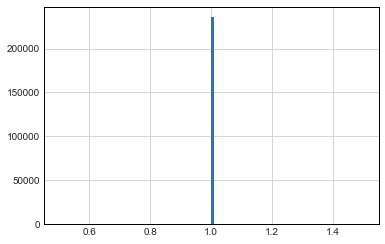

In [201]:

df.ratio = df.fundedamnt/df.loanamnt.astype(float,3)


df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

## Installment Histogram

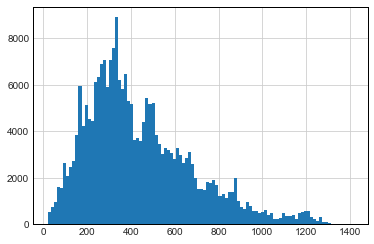

In [143]:
df.installment.hist(bins=100)

##### Meanr response

In [214]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})


In [217]:
df.head()

,addrstate,mthssincelastdelinq,grade,secappmthssincelastmajorderog,installment,totalbalil,accnowdelinq,numtl30dpd,earliestcrline,openrv12m,...,mthssincerecentbc,openactil,pubrec,openrv24m,intrate,secappopenacc,pubrecbankruptcies,secappcollections12mthsexmed,issued,loanstatus
0,CA,42.0,A,NaN,321.08,NaN,0.0,0.0,Sep-1989,NaN,...,5.0,NaN,0.0,NaN,6.99%,NaN,0.0,NaN,Dec-2014,1
1,VA,NaN,C,NaN,336.64,NaN,0.0,0.0,Aug-1994,NaN,...,47.0,NaN,0.0,NaN,12.39%,NaN,0.0,NaN,Dec-2014,0
2,NJ,NaN,C,NaN,326.53,NaN,0.0,0.0,Nov-1992,NaN,...,24.0,NaN,0.0,NaN,13.66%,NaN,0.0,NaN,Dec-2014,0
3,AZ,NaN,C,NaN,260.20,NaN,0.0,0.0,Aug-2002,NaN,...,17.0,NaN,0.0,NaN,13.66%,NaN,0.0,NaN,Dec-2014,1
5,MO,60.0,D,NaN,516.36,NaN,0.0,0.0,Aug-2003,NaN,...,7.0,NaN,0.0,NaN,15.59%,NaN,0.0,NaN,Dec-2014,0


## Visualization for categorical feature

In [218]:
cat_var = [
'addrstate',
'grade',
# 'earliestcrline',
 'initialliststatus',
# 'emptitle',
 'verificationstatus',
 'homeownership',
 'term',
 'applicationtype',
 'purpose',
 'subgrade',
 #'id',
 'emplength',
# 'zipcode',
# 'revolutil',
# 'intrate',
# 'issued',
# 'loanstatus'
          ]
n = len(cat_var)
n

10

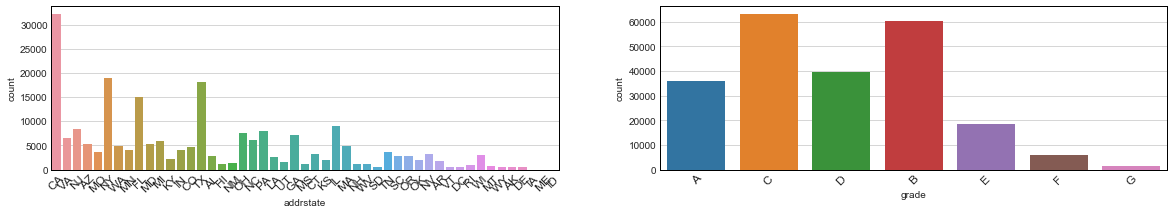

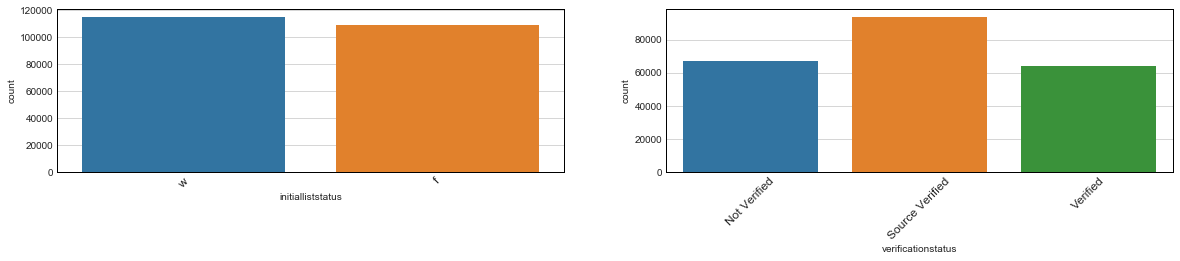

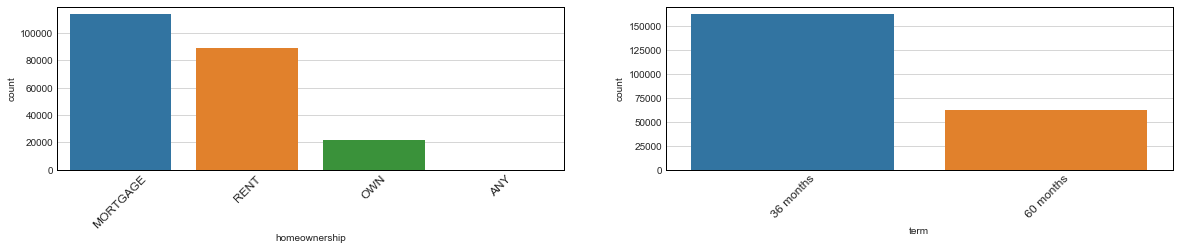

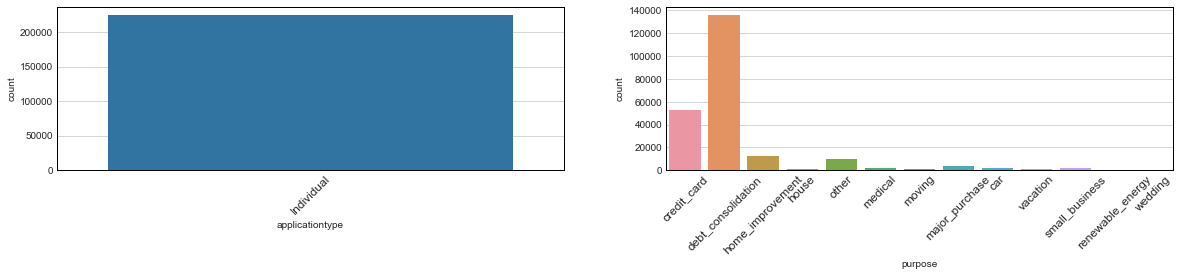

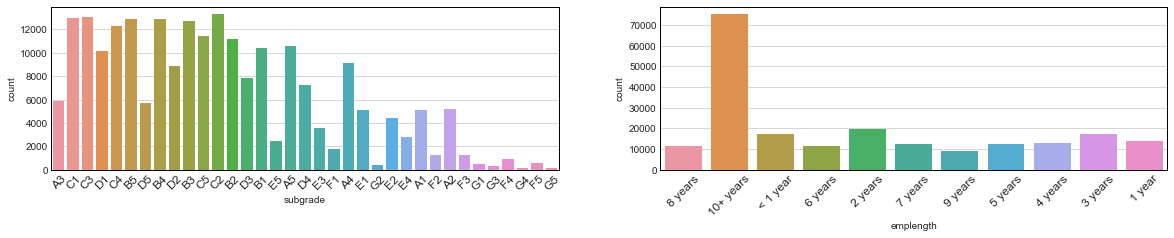

In [231]:
n_cols = 2
n_rows = 5
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(20, 3))
    for j in range(n_cols):
        g = sns.countplot( x = cat_var[i*n_cols+j], 
                          data=df, 
                          ax=ax[j])

        g.set_xticklabels(labels =g.get_xticklabels(), fontdict={'fontsize':12}, rotation = 45)
        

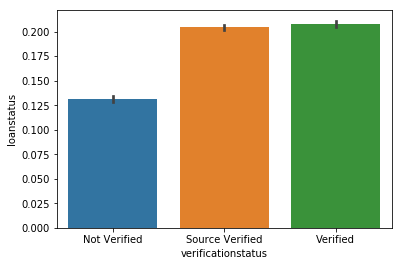

In [56]:
# why verified incomes gives higher default rates?
# verificationstatus
sns.barplot(x ='verificationstatus', y='loanstatus', data=df)

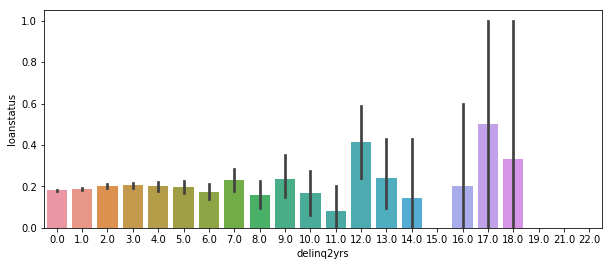

In [60]:
#delinq2yrs
plt.figure(figsize=(10,4))
sns.barplot(x="delinq2yrs", y='loanstatus', data=df)

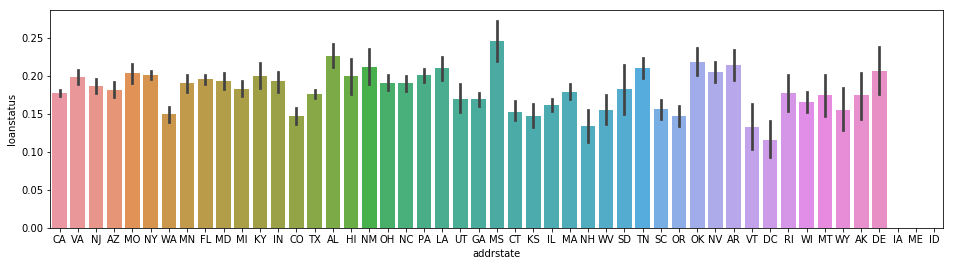

In [63]:
# addrstate
plt.figure(figsize=(16,4))
sns.barplot(x="addrstate", y='loanstatus', data=df)

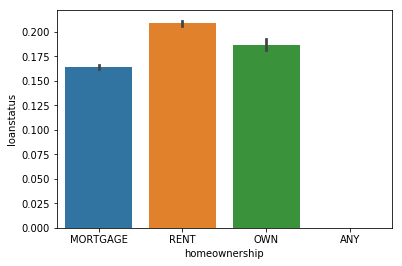

In [64]:
# homeownership
sns.barplot(x='homeownership', y='loanstatus', data=df)

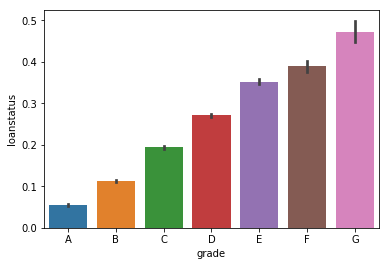

In [65]:
# grade
sns.barplot(x= "grade", y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [66]:
# subgrade
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

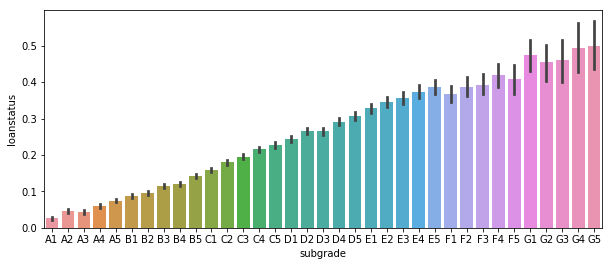

In [67]:
plt.figure(figsize=(10,4))
sns.barplot(x= "subgrade", y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

## Visualization for numerical feature

In [155]:
feat_name = 'dti'
factor = pd.qcut(df[feat_name],5, duplicates='drop',  labels = False)
factor
table=df.groupby([factor, 'loanstatus']).size()
print(table)
table = table.unstack('loanstatus')
print(table)
table.div(table.sum(1), axis=0)

dti  loanstatus
0    0             38755
     1              6198
1    0             37926
     1              7015
2    0             36928
     1              7985
3    0             35697
     1              9182
4    0             34042
     1             10878
dtype: int64
loanstatus      0      1
dti                     
0           38755   6198
1           37926   7015
2           36928   7985
3           35697   9182
4           34042  10878


loanstatus,0,1
dti,,
0,0.862123,0.137877
1,0.843906,0.156094
2,0.822212,0.177788
3,0.795405,0.204595
4,0.757836,0.242164


In [191]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10" , ax = ax )
    
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 18)
    ax.set_ylabel('Default Rate', fontsize = 18)
    
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 16)
    
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name, fontsize=20 )
    
   # fig.savefig('age.jpg')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


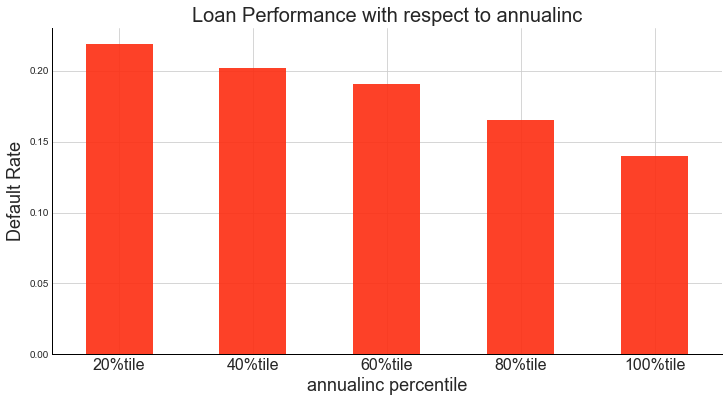

In [192]:
countinuous_variable_plot('annualinc')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


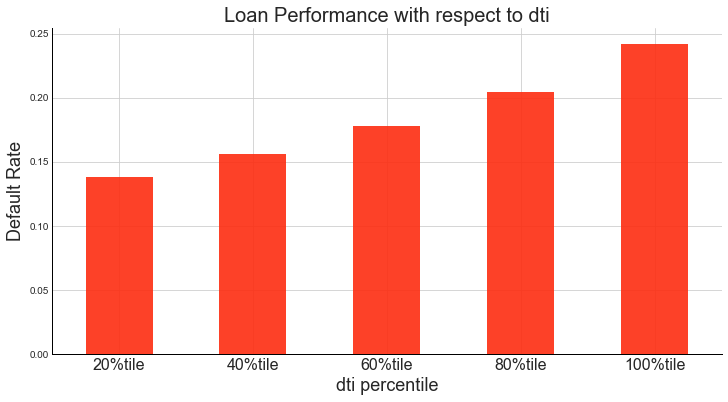

In [193]:
countinuous_variable_plot('dti')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


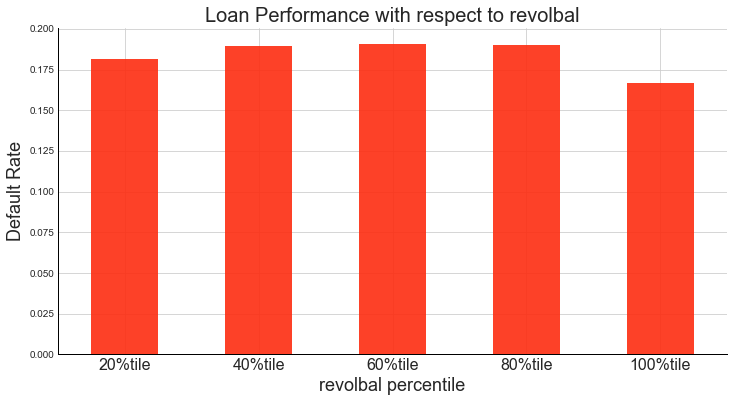

In [194]:
countinuous_variable_plot('revolbal')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


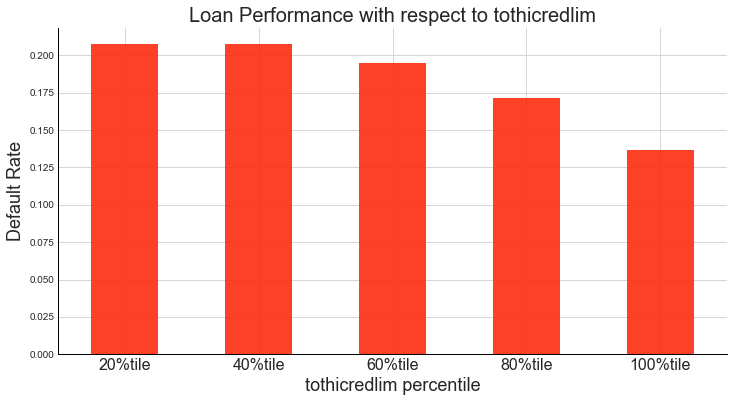

In [195]:
countinuous_variable_plot('tothicredlim')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


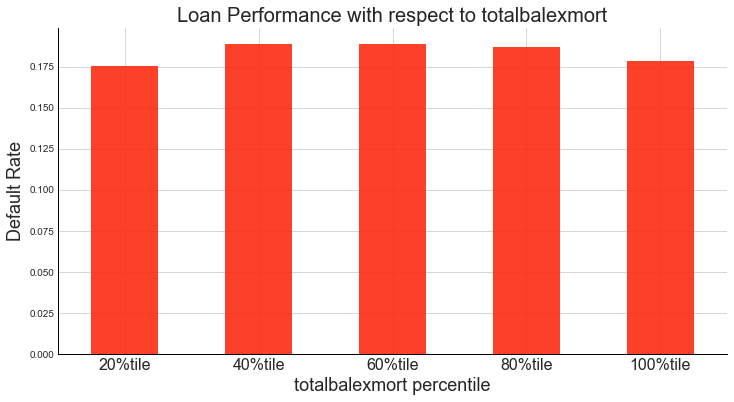

In [196]:
countinuous_variable_plot('totalbalexmort')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


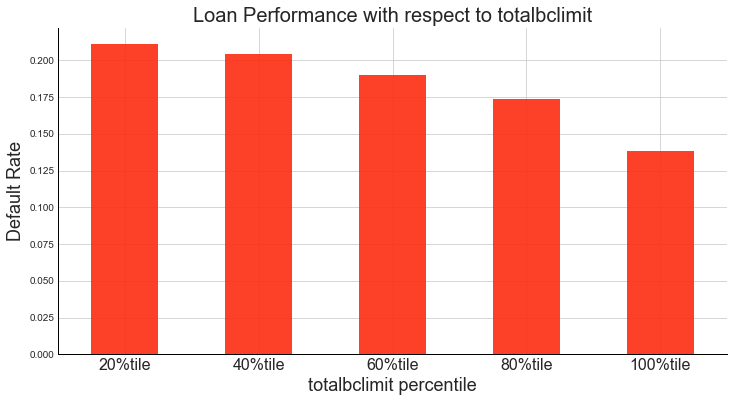

In [197]:
countinuous_variable_plot('totalbclimit')

C:\Users\chloe.song\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


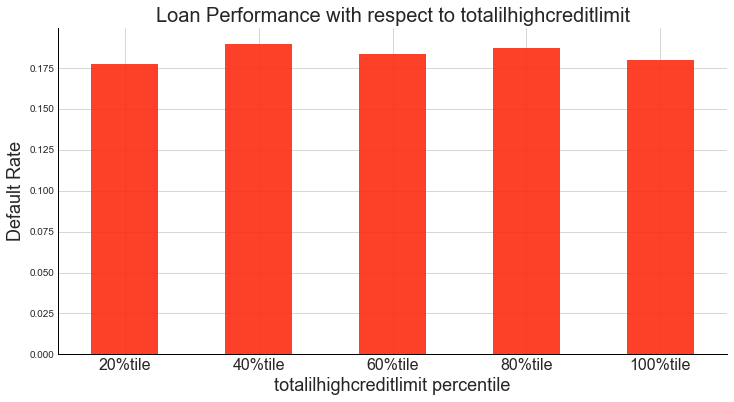

In [198]:
countinuous_variable_plot('totalilhighcreditlimit')